In [1]:
from google.colab import files
uploaded = files.upload()

Saving disease_symptoms_dataset.csv to disease_symptoms_dataset (1).csv


In [2]:
import pandas as pd

df = pd.read_csv("disease_symptoms_dataset.csv")
df.head()

,symptoms,disease
0,"headache,fever",Flu
1,"fatigue,cough",Flu
2,"cough,fatigue",Flu
3,"fatigue,sore_throat,fever,headache",Flu
4,"headache,cough,sore_throat",Flu


In [3]:
df.shape

(1080, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   symptoms  1080 non-null   object
 1   disease   1080 non-null   object
dtypes: object(2)
memory usage: 17.0+ KB


In [5]:
df.sample(5)

,symptoms,disease
213,"headache,sweating,nausea,fever",Malaria
977,"pale_skin,fatigue,shortness_of_breath",Anemia
406,"chest_tightness,cough,breathing_difficulty,whe...",Asthma
911,"fever,joint_pain,nausea",Dengue
946,"fever,nausea",Dengue


In [6]:
df['disease'].value_counts()

,count
disease,
Flu,60
Common Cold,60
COVID-19,60
Malaria,60
Typhoid,60
Migraine,60
Asthma,60
Diabetes,60
Hypertension,60


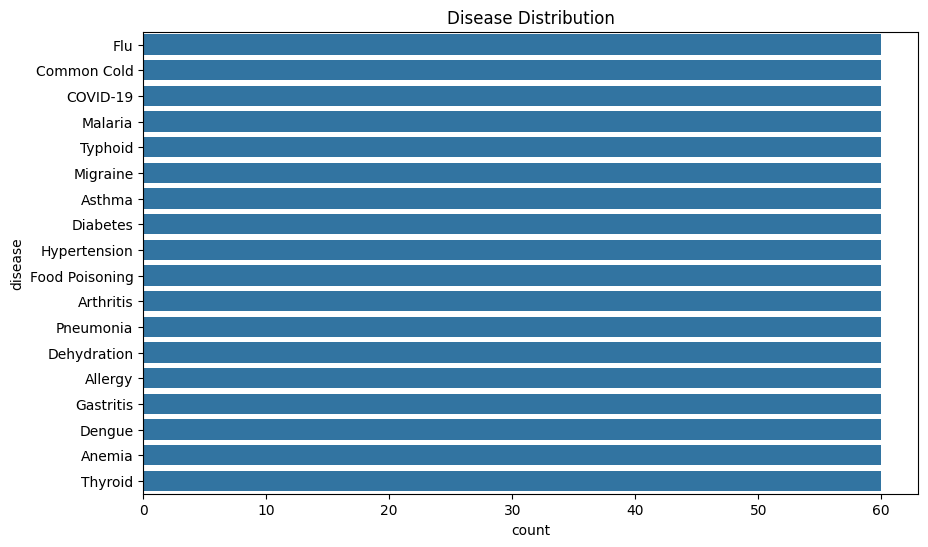

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(y=df['disease'], order=df['disease'].value_counts().index)
plt.title("Disease Distribution")
plt.show()

In [8]:
df['symptoms_list'] = df['symptoms'].str.split(',')
df[['symptoms', 'symptoms_list']].head()

,symptoms,symptoms_list
0,"headache,fever","[headache, fever]"
1,"fatigue,cough","[fatigue, cough]"
2,"cough,fatigue","[cough, fatigue]"
3,"fatigue,sore_throat,fever,headache","[fatigue, sore_throat, fever, headache]"
4,"headache,cough,sore_throat","[headache, cough, sore_throat]"


In [9]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
X = mlb.fit_transform(df['symptoms_list'])
y = df['disease']

print("Number of symptoms (features):", len(mlb.classes_))
print("Example feature vector:", X[0])

Number of symptoms (features): 38
Example feature vector: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

Training size: (864, 38)
Testing size: (216, 38)


In [11]:
y_train.value_counts()

,count
disease,
COVID-19,48
Anemia,48
Flu,48
Allergy,48
Dehydration,48
Hypertension,48
Dengue,48
Diabetes,48
Thyroid,48


In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
model = RandomForestClassifier(
    n_estimators=250,
    class_weight='balanced',
    random_state=42
)

model.fit(X_train, y_train)

print("Model training completed!")

Model training completed!


In [14]:
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

       Allergy       1.00      0.92      0.96        12
        Anemia       1.00      1.00      1.00        12
     Arthritis       1.00      1.00      1.00        12
        Asthma       1.00      0.92      0.96        12
      COVID-19       0.90      0.75      0.82        12
   Common Cold       0.92      1.00      0.96        12
   Dehydration       1.00      0.83      0.91        12
        Dengue       1.00      1.00      1.00        12
      Diabetes       1.00      1.00      1.00        12
           Flu       0.80      1.00      0.89        12
Food Poisoning       1.00      0.92      0.96        12
     Gastritis       0.92      1.00      0.96        12
  Hypertension       0.92      1.00      0.96        12
       Malaria       1.00      0.92      0.96        12
      Migraine       0.92      1.00      0.96        12
     Pneumonia       0.85      0.92      0.88        12
       Thyroid       1.00      1.00      1.00  

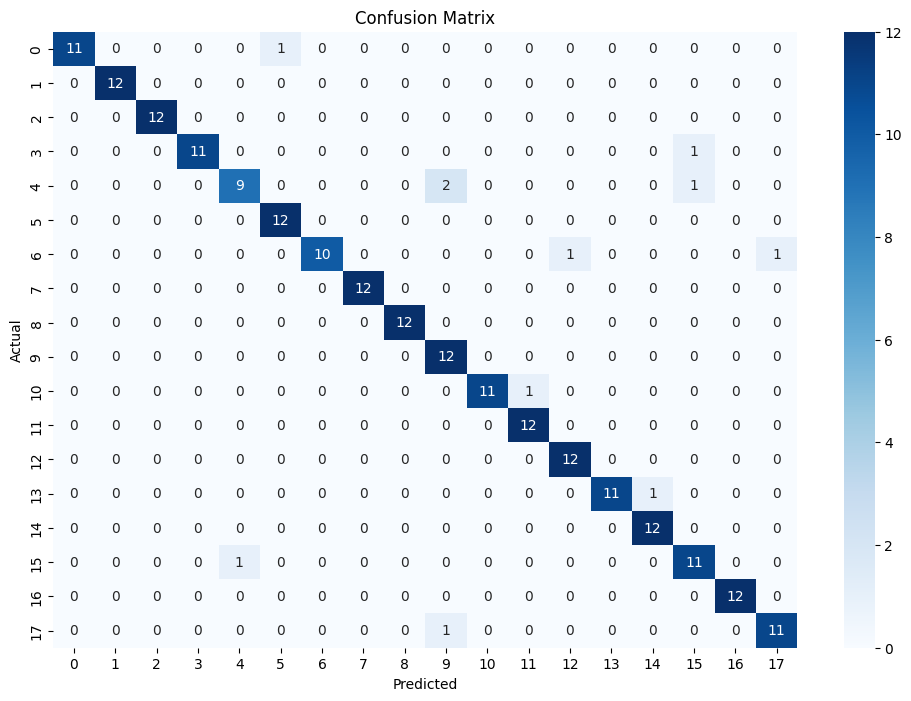

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

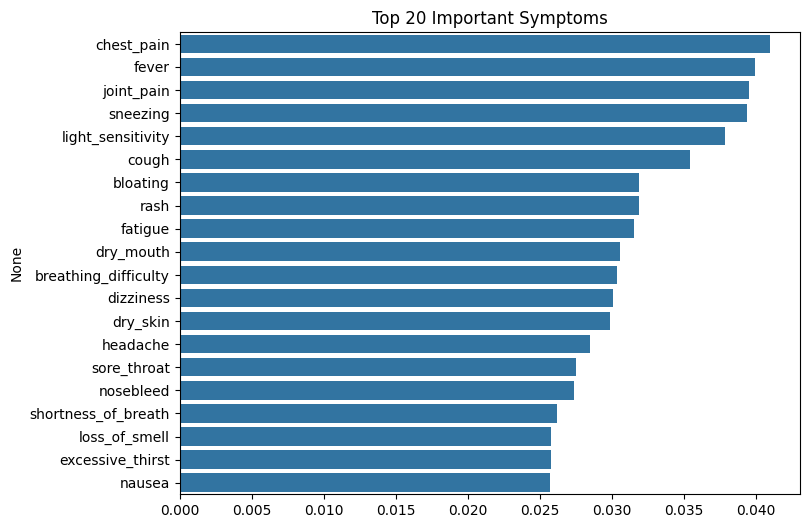

In [17]:
import pandas as pd

feat_imp = pd.Series(model.feature_importances_, index=mlb.classes_)
feat_imp = feat_imp.sort_values(ascending=False).head(20)

plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Top 20 Important Symptoms")
plt.show()

In [18]:
with open("metrics.txt", "w") as f:
    f.write(classification_report(y_test, y_pred))

In [19]:
from google.colab import files
files.download("metrics.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
import joblib

model_data = {
    'model': model,
    'mlb': mlb
}

joblib.dump(model_data, "disease_model.joblib")

print("Model saved as disease_model.joblib")

Model saved as disease_model.joblib


In [21]:
from google.colab import files
files.download("disease_model.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
import json

with open("symptom_labels.json", "w") as f:
    json.dump(list(mlb.classes_), f)

files.download("symptom_labels.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>